In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt 
%matplotlib inline
import numpy as np

In [3]:
data=pd.read_csv("C:/Users/Manikanta/Machine learning/CSV Files/income.csv")
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


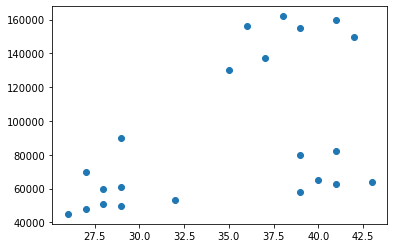

In [4]:
plt.scatter(data.Age,data["Income($)"])

In [5]:
# so from the above scatter plot we can form three clusters

In [6]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [7]:
y_pred=km.fit_predict(data[["Age","Income($)"]])

In [8]:
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [9]:
data["cluster"]=y_pred

In [10]:
data.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [11]:
data0=data[data.cluster==0]
data1=data[data.cluster==1]
data2=data[data.cluster==2]

In [12]:
data1

,Name,Age,Income($),cluster
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1
10,Donald,37,137000,1


In [13]:
data2

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
19,Alia,39,80000,2
20,Sid,41,82000,2


In [14]:
data0

,Name,Age,Income($),cluster
2,Mohan,29,61000,0
3,Ismail,28,60000,0
11,Tom,26,45000,0
12,Arnold,27,48000,0
13,Jared,28,51000,0
14,Stark,29,49500,0
15,Ranbir,32,53000,0
16,Dipika,40,65000,0
17,Priyanka,41,63000,0
18,Nick,43,64000,0


No handles with labels found to put in legend.


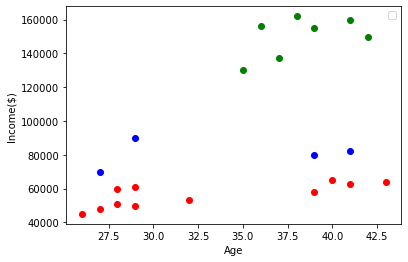

In [15]:
%matplotlib inline
plt.scatter(data0.Age,data0["Income($)"],color="red")
plt.scatter(data1.Age,data1["Income($)"],color="green")
plt.scatter(data2.Age,data2["Income($)"],color="blue")
plt.xlabel("Age",color="black")
plt.ylabel("Income($) ",color="black")
plt.legend()

In [16]:
# in above scatter plot we have little much error's in red and blue clusters
# it is because of we didn't do scalin on the data

In [17]:
scaler=MinMaxScaler()

In [18]:
data["Income ($)"]=scaler.fit_transform(data[["Income($)"]])
data["Age"]=scaler.fit_transform(data[["Age"]])

In [19]:
data.head()

,Name,Age,Income($),cluster,Income ($)
0,Rob,0.058824,70000,2,0.213675
1,Michael,0.176471,90000,2,0.384615
2,Mohan,0.176471,61000,0,0.136752
3,Ismail,0.117647,60000,0,0.128205
4,Kory,0.941176,150000,1,0.897436


In [20]:
data=data.drop("Income($)",axis="columns")

In [21]:
data.head()

,Name,Age,cluster,Income ($)
0,Rob,0.058824,2,0.213675
1,Michael,0.176471,2,0.384615
2,Mohan,0.176471,0,0.136752
3,Ismail,0.117647,0,0.128205
4,Kory,0.941176,1,0.897436


In [22]:
km1=KMeans(n_clusters=3)
km1

KMeans(n_clusters=3)

In [23]:
y_pred=km1.fit_predict(data[["Age","Income ($)"]])

In [24]:
data["cluster"]=y_pred

In [25]:
data.head()

,Name,Age,cluster,Income ($)
0,Rob,0.058824,1,0.213675
1,Michael,0.176471,1,0.384615
2,Mohan,0.176471,1,0.136752
3,Ismail,0.117647,1,0.128205
4,Kory,0.941176,0,0.897436


No handles with labels found to put in legend.


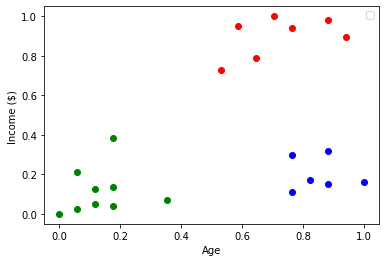

In [26]:
data0=data[data.cluster==0]
data1=data[data.cluster==1]
data2=data[data.cluster==2]

%matplotlib inline
plt.scatter(data0.Age,data0["Income ($)"],color="red")
plt.scatter(data1.Age,data1["Income ($)"],color="green")
plt.scatter(data2.Age,data2["Income ($)"],color="blue")
plt.xlabel("Age",color="black")
plt.ylabel("Income ($) ",color="black")
plt.legend()

##### finding the centroid of each cluster and visualizing in the scatter plot

In [27]:
km1.cluster_centers_  # to find the centroids of clusters

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

No handles with labels found to put in legend.


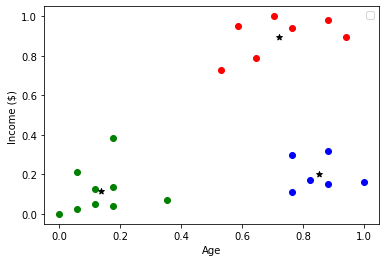

In [28]:
plt.scatter(data0.Age,data0["Income ($)"],color="red")
plt.scatter(data1.Age,data1["Income ($)"],color="green")
plt.scatter(data2.Age,data2["Income ($)"],color="blue")
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],color="black",marker="*")
plt.xlabel("Age",color="black")
plt.ylabel("Income ($) ",color="black")
plt.legend()

In [29]:
# how to determine correct number of clusters (k)?
# the answer for this question is elbow techique

In [30]:
# elbow techique

In [39]:
k_range=range(1,10)
sum_of_square_error=[]
for k in k_range:
    km1=KMeans(n_clusters=k)
    km1.fit(data[["Age","Income ($)"]])
    sum_of_square_error.append(km1.inertia_)

AttributeError: 'NoneType' object has no attribute 'split'

In [41]:
k_range=range(2,10)
sum_of_square_error=[]
for k in k_range:
    km1=KMeans(n_clusters=k)
    km1.fit(data[["Age","Income ($)"]])
    sum_of_square_error.append(km1.inertia_)

In [42]:
sum_of_square_error  # here sum of squared error means in every cluster we have centroid and data points
                     # the sum of squares of distance between centroid and data points in respective clusters

[2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.21578607765873023,
 0.17840674931327935,
 0.13265419827245162,
 0.10188787724979426]

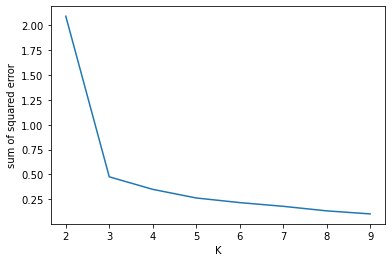

In [43]:
plt.xlabel('K')
plt.ylabel("sum of squared error")
plt.plot(k_range,sum_of_square_error)

In [44]:
# so from the above scatter plot we should use n_clusters=3 because the 3 is at the elbow
# this is known as elbow techique

### exercise

In [1]:
"""
Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
Figure out if any preprocessing such as scaling would help here
Draw elbow plot and from that figure out optimal value of k

"""

'\nUse iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.\nFigure out if any preprocessing such as scaling would help here\nDraw elbow plot and from that figure out optimal value of k\n\n'

In [72]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt 
%matplotlib inline
import numpy as np

In [73]:
from sklearn.datasets import load_iris

In [74]:
iris=load_iris()

In [75]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [76]:
iris.data.shape

(150, 4)

In [77]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [78]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [79]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [80]:
df=df.drop(columns=["sepal length (cm)","sepal width (cm)"])

In [81]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [82]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

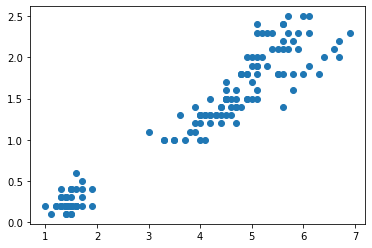

In [83]:
plt.scatter(df["petal length (cm)"],df["petal width (cm)"])

In [84]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [85]:
km2=KMeans(n_clusters=3)
km2

KMeans(n_clusters=3)

In [86]:
yp=km2.fit_predict(df)

In [87]:
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [88]:
df["cluster"]=yp

In [89]:
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [90]:
df.cluster.unique()

array([0, 2, 1])

In [91]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

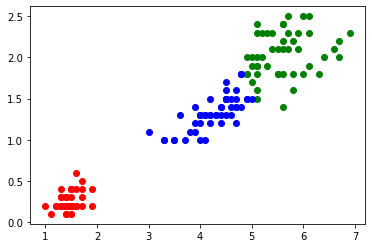

In [92]:
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color="red")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color="green")
plt.scatter(df3["petal length (cm)"],df3["petal width (cm)"],color="blue")

### elbow plot

In [95]:
k_range=range(2,10)
sum_of_square_error=[]
for k in k_range:
    km3=KMeans(n_clusters=k)
    km3.fit(df)
    sum_of_square_error.append(km3.inertia_)

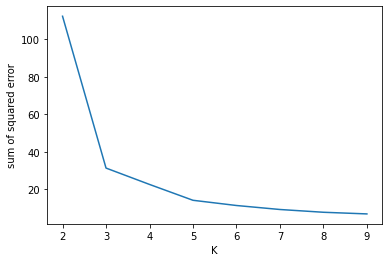

In [96]:
plt.xlabel('K')
plt.ylabel("sum of squared error")
plt.plot(k_range,sum_of_square_error)

In [97]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [98]:
# above target_names are three only so the minimum value of k must be 3